In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model

## Load Data Set 

In [6]:
X_test = np.load("../data/cibs-ddsm/processed/X_test.npy")
y_test = np.load("../data/cibs-ddsm/processed/y_test.npy")

## Load Final Trained Model

In [7]:
from tensorflow.keras.models import load_model

model = load_model("results/model_weights/final_model.h5")

## Run Predictions

In [8]:
y_probs = model.predict(X_test).flatten()
y_pred = (y_probs > 0.5).astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


## Evaluate with Classification Metrics

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification report
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc:.3f}")

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       422
           1       0.00      0.00      0.00       292

    accuracy                           0.59       714
   macro avg       0.30      0.50      0.37       714
weighted avg       0.35      0.59      0.44       714

AUC: 0.493


## Confusion Matrix

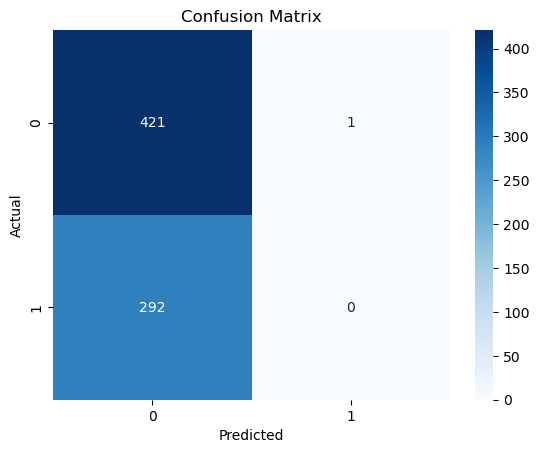

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

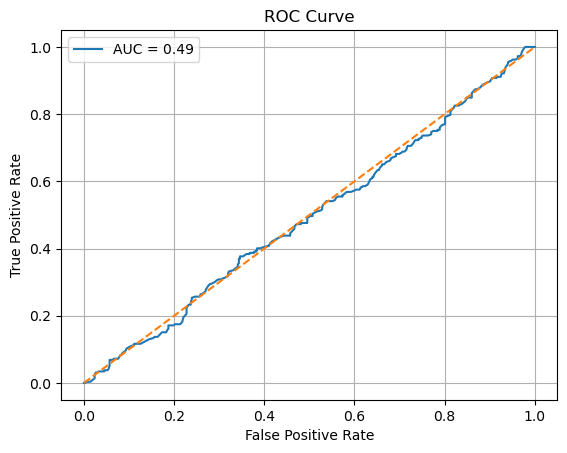

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
misclassified_idxs = np.where(y_test != y_pred)[0]
sample_idx = misclassified_idxs[0]

img_tensor = tf.convert_to_tensor(X_test[sample_idx:sample_idx+1])
heatmap = make_gradcam_heatmap(img_tensor, model, last_conv_layer_name)
overlay = overlay_heatmap("path/to/image.jpg", heatmap)

plt.imshow(overlay)
plt.title("Grad-CAM on Misclassified Sample")
plt.axis("off")
plt.show()

NameError: name 'make_gradcam_heatmap' is not defined